In [3]:
import pandas as pd

df = pd.read_csv("datasets/2022/auto_augment.csv")
df = df.dropna(subset=["aii_p", "aug_p"]).copy()
df["resilience_index"] = df["aug_p"] - df["aii_p"]
df[["Title", "aii_p", "aug_p", "resilience_index"]]

print(df[["Title", "aii_p", "aug_p", "resilience_index"]].head(100).to_string())

                                                                  Title  aii_p  aug_p  resilience_index
0                                                      Chief Executives      0      0                 0
1                                       General and Operations Managers      9      7                -2
2                                   Advertising and Promotions Managers      0      0                 0
3                                                    Marketing Managers      0      0                 0
4                                                        Sales Managers      9      0                -9
5                                      Administrative Services Managers      0     16                16
6                             Computer and Information Systems Managers      0     45                45
7                                                    Financial Managers      0      3                 3
8                                        Industrial Production M

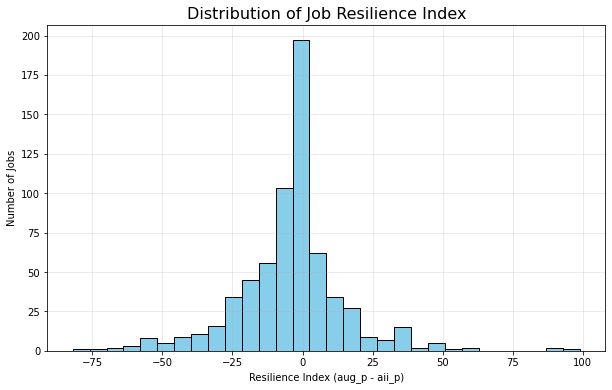

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df["resilience_index"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Job Resilience Index", fontsize=16)
plt.xlabel("Resilience Index (aug_p - aii_p)")
plt.ylabel("Number of Jobs")
plt.grid(alpha=0.3)
plt.show()

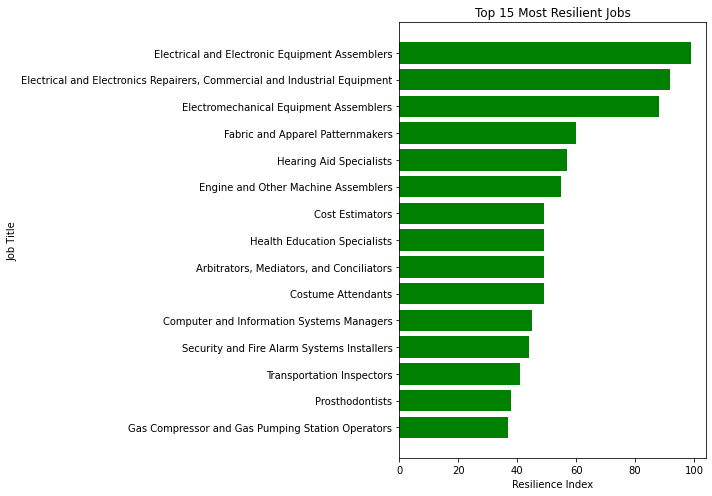

In [6]:
top_resilient = df.nlargest(15, "resilience_index")

plt.figure(figsize=(10, 7))
plt.barh(top_resilient["Title"], top_resilient["resilience_index"], color="green")
plt.title("Top 15 Most Resilient Jobs")
plt.xlabel("Resilience Index")
plt.ylabel("Job Title")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

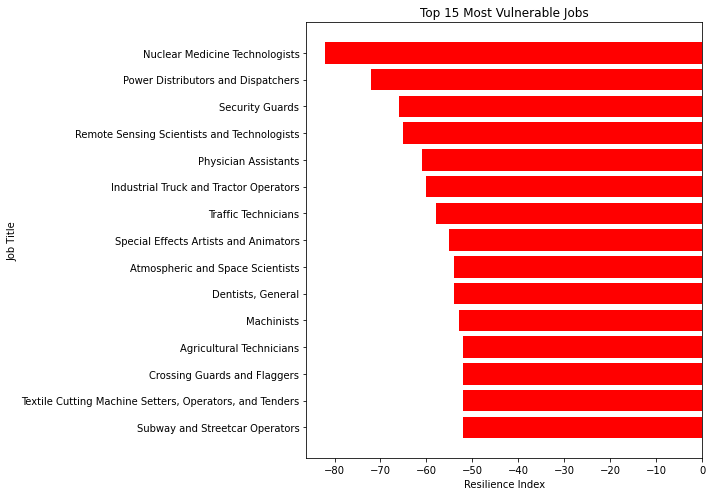

In [7]:
bottom_resilient = df.nsmallest(15, "resilience_index")

plt.figure(figsize=(10, 7))
plt.barh(bottom_resilient["Title"], bottom_resilient["resilience_index"], color="red")
plt.title("Top 15 Most Vulnerable Jobs")
plt.xlabel("Resilience Index")
plt.ylabel("Job Title")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

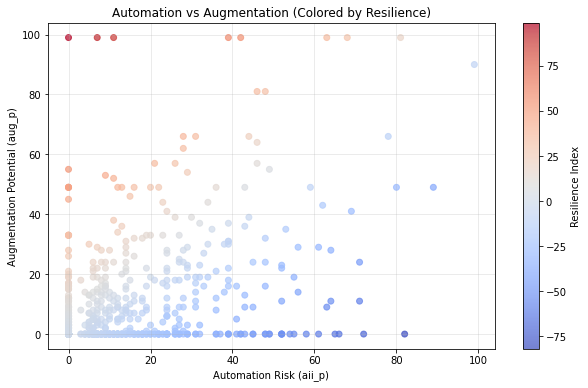

In [8]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df["aii_p"],
    df["aug_p"],
    c=df["resilience_index"],
    cmap="coolwarm",
    alpha=0.7
)

plt.colorbar(scatter, label="Resilience Index")
plt.xlabel("Automation Risk (aii_p)")
plt.ylabel("Augmentation Potential (aug_p)")
plt.title("Automation vs Augmentation (Colored by Resilience)")
plt.grid(alpha=0.3)
plt.show()